In [36]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import wget
url = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json'
wget.download(url)

'sarcasm (1).json'

In [38]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [39]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [41]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [42]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [43]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [44]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [45]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [46]:
training_padded, type(training_padded)

(array([[ 328,    1,  799, ...,    0,    0,    0],
        [   4, 6840, 3096, ...,    0,    0,    0],
        [ 153,  890,    2, ...,    0,    0,    0],
        ...,
        [  79, 1729,    1, ...,    0,    0,    0],
        [  53, 5108, 4735, ...,    0,    0,    0],
        [ 312,  705,    1, ...,    0,    0,    0]], dtype=int32),
 numpy.ndarray)

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [49]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/100
625/625 - 3s - loss: 0.6654 - accuracy: 0.5861 - val_loss: 0.5768 - val_accuracy: 0.6959 - 3s/epoch - 5ms/step
Epoch 2/100
625/625 - 4s - loss: 0.4260 - accuracy: 0.8292 - val_loss: 0.3826 - val_accuracy: 0.8399 - 4s/epoch - 6ms/step
Epoch 3/100
625/625 - 4s - loss: 0.3081 - accuracy: 0.8766 - val_loss: 0.3661 - val_accuracy: 0.8377 - 4s/epoch - 6ms/step
Epoch 4/100
625/625 - 3s - loss: 0.2564 - accuracy: 0.8997 - val_loss: 0.3420 - val_accuracy: 0.8554 - 3s/epoch - 5ms/step
Epoch 5/100
625/625 - 3s - loss: 0.2215 - accuracy: 0.9131 - val_loss: 0.3458 - val_accuracy: 0.8577 - 3s/epoch - 5ms/step
Epoch 6/100
625/625 - 2s - loss: 0.1937 - accuracy: 0.9276 - val_loss: 0.3541 - val_accuracy: 0.8520 - 2s/epoch - 3ms/step
Epoch 7/100
625/625 - 2s - loss: 0.1716 - accuracy: 0.9357 - val_loss: 0.3702 - val_accuracy: 0.8517 - 2s/epoch - 3ms/step
Epoch 8/100
625/625 - 2s - loss: 0.1549 - accuracy: 0.9434 - val_loss: 0.3795 - val_accuracy: 0.8539 - 2s/epoch - 3ms/step
Epoch 9/100
625/

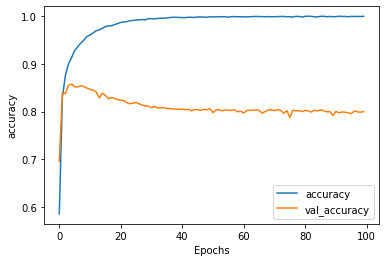

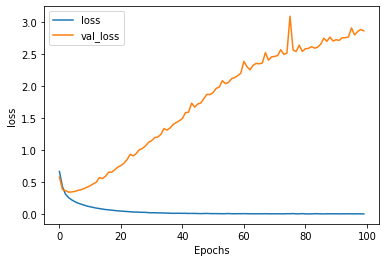

In [50]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [51]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [52]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [53]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.9997294e-01]
 [1.5425896e-14]]


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [69]:
y_pred=model.predict(testing_padded)
y_pred = y_pred > 0.5

In [71]:
conf_matrix = confusion_matrix(y_true=testing_labels, y_pred=y_pred)


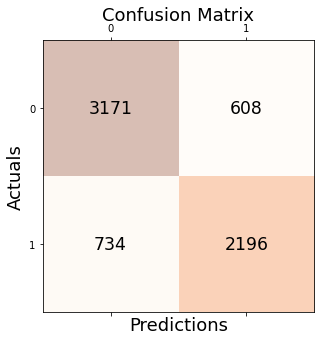

In [72]:
#Print the confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [73]:
#F1 score
print('F1 Score: %.3f' % f1_score(testing_labels, y_pred))


F1 Score: 0.766
